# Try to remove doublet from macaque scRNAseq data by Scrublet

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
os.chdir('/data/User/sunym/project/Brain/')
os.getcwd()

'/data/User/sunym/project/Brain'

## A50A

### read data

In [4]:
A50A_RNA = pd.read_csv('/data/User/sunym/temp/A50A_raw_counts.csv')
A50A_RNA = A50A_RNA.drop(columns=['Unnamed: 0'])
A50A_RNA = A50A_RNA.T
A50A_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGCAATTCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGAGATGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATTCTCCG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATTGAGCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAGTACTAGCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCATTGAGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCGTTCCCA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCTAAGCGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCTCACGAA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
A50A_cell_list = A50A_RNA.index
A50A_cell_list

Index(['AAACCCAAGCAATTCC.1', 'AAACCCACAGAGATGC.1', 'AAACCCACATTCTCCG.1',
       'AAACCCACATTGAGCT.1', 'AAACCCAGTACTAGCT.1', 'AAACCCAGTAGAGCTG.1',
       'AAACCCAGTAGGCTCC.1', 'AAACCCAGTGAGTCAG.1', 'AAACCCAGTTACAGCT.1',
       'AAACCCAGTTCGGCTG.1',
       ...
       'TTTGTTGGTGCTGTCG.1', 'TTTGTTGGTGTGTACT.1', 'TTTGTTGGTTAAGTCC.1',
       'TTTGTTGGTTTACGTG.1', 'TTTGTTGTCACTGTTT.1', 'TTTGTTGTCATTGAGC.1',
       'TTTGTTGTCGTTCCCA.1', 'TTTGTTGTCTAAGCGT.1', 'TTTGTTGTCTCACGAA.1',
       'TTTGTTGTCTTTACAC.1'],
      dtype='object', length=19187)

In [6]:
A50A_RNA = A50A_RNA.values

### Scrublet

In [7]:
scrub = scr.Scrublet(A50A_RNA, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 7.1%
Estimated detectable doublet fraction = 44.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 15.8%
Elapsed time: 29.1 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

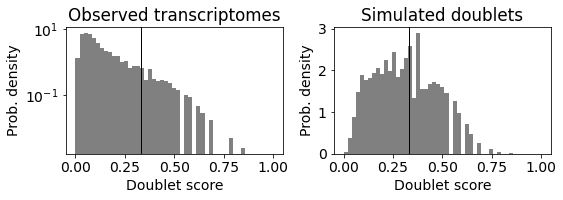

In [8]:
scrub.plot_histogram()

Running UMAP...
Done.


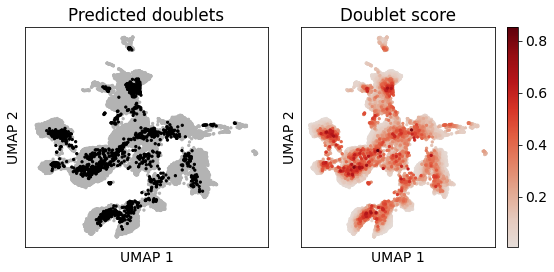

In [9]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [10]:
a = np.array([A50A_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_7_fig_210825/A50A_scrublet_210825.csv', index=False,header=True)

## A82A

### read data

In [11]:
A82A_RNA = pd.read_csv('/data/User/sunym/temp/A82A_raw_counts.csv')
A82A_RNA = A82A_RNA.drop(columns=['Unnamed: 0'])
A82A_RNA = A82A_RNA.T
A82A_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGACAAGCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGAGTCCGA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGATGTTAG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGCCTGCCA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGCGTTGA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCGTCTAAG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCTCAGTCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCTTACCGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCTTCCCGA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
A82A_cell_list = A82A_RNA.index
A82A_cell_list

Index(['AAACCCAAGACAAGCC.1', 'AAACCCAAGAGTCCGA.1', 'AAACCCAAGATGTTAG.1',
       'AAACCCAAGCCTGCCA.1', 'AAACCCAAGGCGTTGA.1', 'AAACCCAAGGGAACAA.1',
       'AAACCCAAGGGCAATC.1', 'AAACCCAAGGTAAGAG.1', 'AAACCCAAGGTGTGAC.1',
       'AAACCCAAGGTTGGTG.1',
       ...
       'TTTGTTGTCAGCTTCC.1', 'TTTGTTGTCATGCCGG.1', 'TTTGTTGTCATTACCT.1',
       'TTTGTTGTCGACGACC.1', 'TTTGTTGTCGGCAGTC.1', 'TTTGTTGTCGTCTAAG.1',
       'TTTGTTGTCTCAGTCC.1', 'TTTGTTGTCTTACCGC.1', 'TTTGTTGTCTTCCCGA.1',
       'TTTGTTGTCTTCGATT.1'],
      dtype='object', length=41257)

In [13]:
A82A_RNA = A82A_RNA.values

### Scrublet

In [14]:
scrub = scr.Scrublet(A82A_RNA, expected_doublet_rate=0.09)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 6.5%
Estimated detectable doublet fraction = 41.1%
Overall doublet rate:
	Expected   = 9.0%
	Estimated  = 15.8%
Elapsed time: 85.3 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

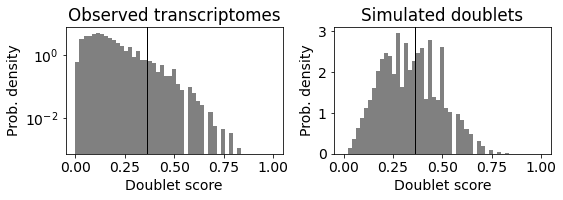

In [15]:
scrub.plot_histogram()

Running UMAP...
Done.


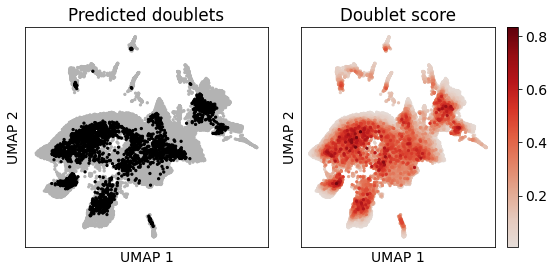

In [16]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [17]:
a = np.array([A82A_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_7_fig_210825/A82A_scrublet_210825.csv', index=False,header=True)

## A82B

### read data

In [18]:
A82B_RNA = pd.read_csv('/data/User/sunym/temp/A82B_raw_counts.csv')
A82B_RNA = A82B_RNA.drop(columns=['Unnamed: 0'])
A82B_RNA = A82B_RNA.T
A82B_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGCCTAGGA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGATGGCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGGCAGTT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTGCGACA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACACCATAAC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCATCCGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCCGGCAAC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCCTCAGGG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCGAAGCCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
A82B_cell_list = A82B_RNA.index
A82B_cell_list

Index(['AAACCCAAGCCTAGGA.1', 'AAACCCAAGGATGGCT.1', 'AAACCCAAGGGCAGTT.1',
       'AAACCCAAGTGCGACA.1', 'AAACCCACACCATAAC.1', 'AAACCCACACCGCTAG.1',
       'AAACCCACACGTAGAG.1', 'AAACCCAGTCAACATC.1', 'AAACCCAGTCCAAGAG.1',
       'AAACCCAGTGTCCAAT.1',
       ...
       'TTTGTTGGTATCAGCT.1', 'TTTGTTGGTATCTCTT.1', 'TTTGTTGGTCACAATC.1',
       'TTTGTTGGTCCCTAAA.1', 'TTTGTTGGTTTACTTC.1', 'TTTGTTGTCCATCCGT.1',
       'TTTGTTGTCCGGCAAC.1', 'TTTGTTGTCCTCAGGG.1', 'TTTGTTGTCGAAGCCC.1',
       'TTTGTTGTCTTACCAT.1'],
      dtype='object', length=21139)

In [20]:
A82B_RNA = A82B_RNA.values

### Scrublet

In [21]:
scrub = scr.Scrublet(A82B_RNA, expected_doublet_rate=0.08)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 13.2%
Estimated detectable doublet fraction = 63.4%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 20.9%
Elapsed time: 37.7 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

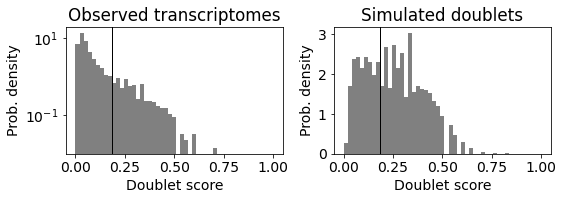

In [22]:
scrub.plot_histogram()

Running UMAP...
Done.


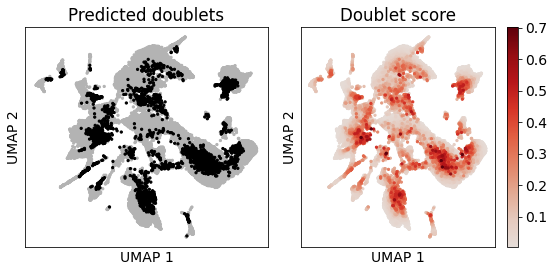

In [23]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [24]:
a = np.array([A82B_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_7_fig_210825/A82B_scrublet_210825.csv', index=False,header=True)